# Model $e^{-\theta_0t}+e^{-(\theta_0+\theta_1)t}$

/home/ktisanic/anaconda3/lib/python3.5/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


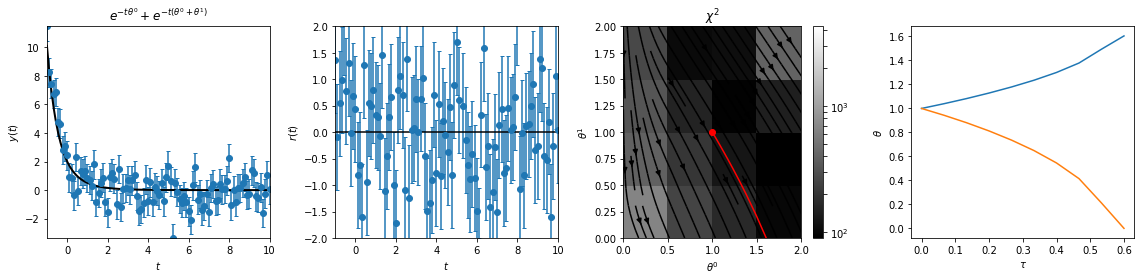

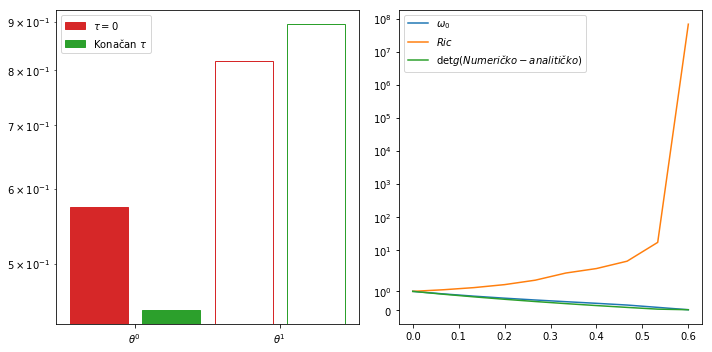

In [6]:
%run "MBAM_codes.py"
class model(MBAM_plotting):
    def __init__(self,*args,**kwargs):
        MBAM_plotting.__init__(self,self._model,'Sum_exp/eksponencijala_2',*args,**kwargs)
        self._title = r'$e^{-t\theta^0}+e^{-t(\theta^0+\theta^1)}$'
    def _model(self,T,θ):
        x1,x2=θ
        return np.exp(-T*x1)+np.exp(-T*(x1+x2))
N_D = 100
σ   = 1
bf  = np.array([1.,1.])
X   = np.linspace(-1,10,N_D)
Y   = np.random.normal(0,σ,N_D)+model._model(model,X,bf)
MPL = model(X,Y,Y/Y,bf,xlim=[0,2],ylim=[0,2])

θ1, θ2, X, Y,ALL=MPL.apply_on_mesh(20,[lambda θ:MPL.χ2(θ),
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][0,0],
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][1,0],
                                       lambda θ:MPL.calc_ω0(θ,0), 
                                       lambda θ:MPL.Ricci_R(θ)])

MPL.MBAM   = MPL.run_MBAM(bf,k=0,T=np.linspace(0,.6,10))


In [7]:
θ1, θ2, X, Y,ALL=MPL.apply_on_mesh(20,[lambda θ:MPL.χ2(θ),
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][0,0],
                                       lambda θ:np.linalg.eigh(MPL.g(θ))[1][1,0],
                                       lambda θ:MPL.calc_ω0(θ,0), 
                                       lambda θ:MPL.Ricci_R(θ)])

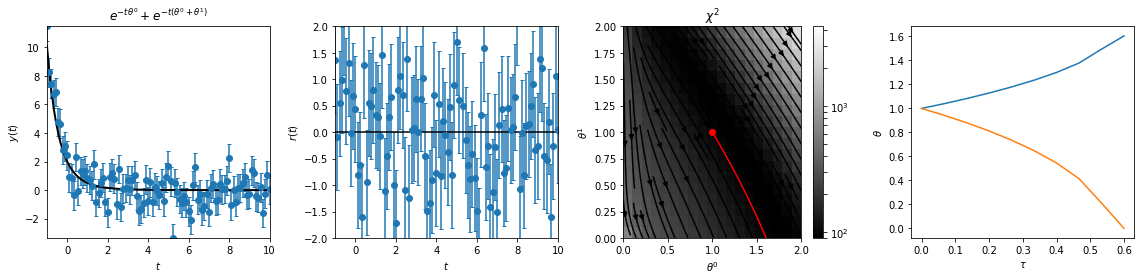

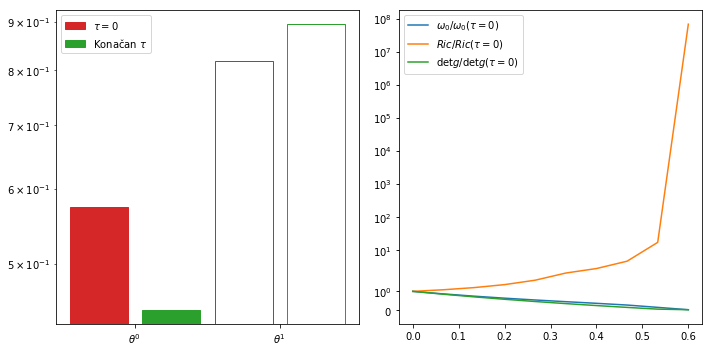

In [11]:
f,ax = plt.subplots(1,4,figsize=(4*4,4))
MPL.plot_data(ax[:2])
MPL.plot_scalar(ax[2],X,Y, ALL[:,:,0], ALL[:,:,1], ALL[:,:,2])
ax[0].set_title(MPL._title)
ax[2].plot(MPL.MBAM.θ[:,0],MPL.MBAM.θ[:,1],'r')
ax[2].set_title('$\chi^2$')
ax[3].plot(MPL.MBAM.τ,MPL.MBAM.θ)
ax[3].set_ylabel(r'$\theta$')
ax[3].set_xlabel(r'$\tau$')
f.tight_layout()
f.savefig(MPL.NAME+'_model.pdf')

f,axs = plt.subplots(1,2,figsize=(10,5))
MPL.bar_plot(axs[0],np.linalg.eigh(MPL.g(MPL.MBAM.θ[0]))[1][0,:],
             np.linalg.eigh(MPL.g(MPL.MBAM.θ[-1]))[1][0,:],colors=['C3','C2'],
             labels=[r"$\tau=0$",r"Konačan $\tau$"])
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.ω0/MPL.MBAM.ω0[0],label=r'$\omega_0/\omega_0(\tau=0)$')
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.R/MPL.MBAM.R[0],label=r'$Ric/Ric(\tau=0)$')
axs[1].plot(MPL.MBAM.τ,MPL.MBAM.detg/MPL.MBAM.detg[0],label=r'$\det g/\det g (\tau=0)$')
axs[1].legend()
axs[1].set_yscale('symlog')
f.tight_layout()
f.savefig(MPL.NAME+'_barplot.pdf')